# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = temps_df = pd.read_csv(data_path)

temps_df.head()


,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [3]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [4]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

# temps_df["AvgTemperatureCelsius"] = ...  # TODO: uncomment this line to complete it

temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5 / 9


temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.611111
72728,US,Washington,49.6,2019-12-28,12,2019,9.777778
72729,US,Washington,48.9,2019-12-29,12,2019,9.388889
72730,US,Washington,55.0,2019-12-30,12,2019,12.777778


In [6]:
# Ex 3.3: How many different cities are there? Provide a list of them.

# TODO: this should be a list of unique countries

# this enables us to convert the column into python lists and the .unique() function allows us to retrieve the number of unique entries in the column. 
unique_cities_list = list(temps_df["City"].unique())
number_unique_cities = len(unique_cities_list)



# TODO: print a message with the number of unique countries and the list of them
print(f"There are {number_unique_cities} unique cities in the dataset:")
print(f" list of cities: {unique_cities_list}")


There are 10 unique cities in the dataset:
 list of cities: ['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [7]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df["Date"].min()
max_date = temps_df["Date"].max()

# TODO: print a message with the min and max dates

print(f"The minimum date in the dataset is {min_date}")
print(f"The maximum date in the dataset is {max_date}")

The minimum date in the dataset is 2000-01-01
The maximum date in the dataset is 2019-12-31


In [14]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.


min_temp = temps_df["AvgTemperatureCelsius"].min()
max_temp = temps_df["AvgTemperatureCelsius"].max()

# we use the values[0] to get the first value of the series, since there could be more than one city/date with the same min/max temperature so as to avoid the same value repeated in a list.
min_temp_city = temps_df.loc[temps_df["AvgTemperatureCelsius"] == min_temp, "City"].values[0] 
min_temp_date = temps_df.loc[temps_df["AvgTemperatureCelsius"] == min_temp, "Date"].values[0]


max_temp_city = temps_df.loc[temps_df["AvgTemperatureCelsius"] == max_temp, "City"].values[0]
max_temp_date = temps_df.loc[temps_df["AvgTemperatureCelsius"] == max_temp, "Date"].values[0]

# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date

print(f"The minimum temperature was {min_temp} degrees celsius, recorded in {min_temp_city} on {min_temp_date}")
print(f"The maximum temperature was {max_temp} degrees celsius, recorded in {max_temp_city} on {max_temp_date}")

The minimum temperature was -16.77777777777778 degrees celsius, recorded in Munich on 2000-01-25
The maximum temperature was 37.888888888888886 degrees celsius, recorded in Cairo on 2019-05-23


/var/folders/jz/vqrs317s4sb6d4vzpy2gm1qw0000gn/T/ipykernel_13535/3476798907.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


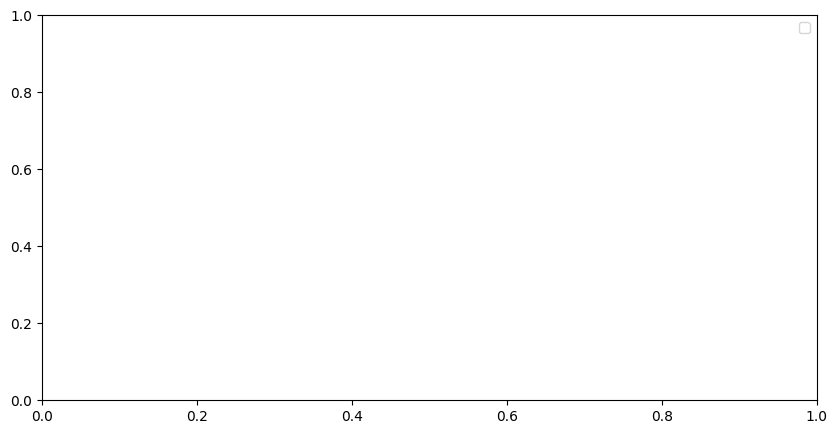

In [8]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = None         # TODO: get a dataframe with the rows of the selected city

city_df_period =  None  # TODO: filter the city_df dataframe to keep only the rows between start_date and end_date (inclusive)

plt.figure(figsize=(10, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

# plt.plot()    # TODO
# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO
plt.legend()

plt.show()


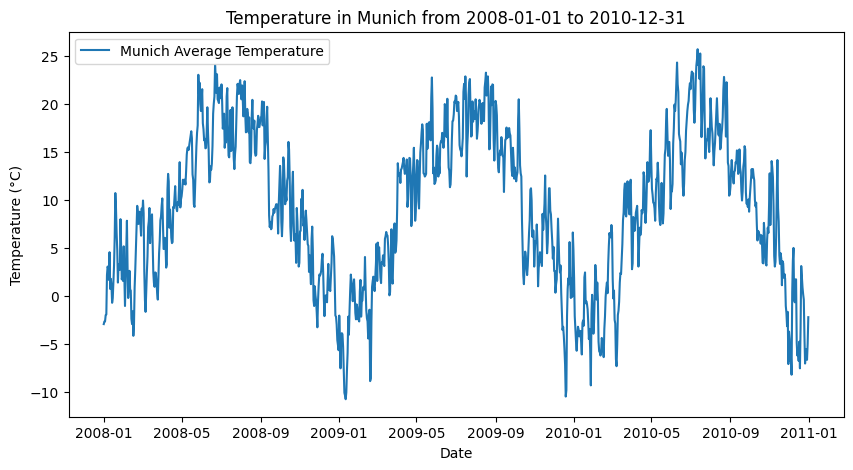

In [9]:
# Ex 3.6: Line plot of temperature for a city and a date range 

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date() 

# Filter for the selected city, in this case Munich. 
city_df = temps_df[temps_df["City"] == city]

# Filter for the selected end and start dates
city_df_period_1 = city_df[city_df["Date"] >= start_date]
city_df_period_2 = city_df_period_1[city_df_period_1["Date"] <= end_date]

# Line plot for munich over the period selected. 
plt.figure(figsize=(10, 5))
plt.plot(city_df_period_2["Date"], city_df_period_2["AvgTemperatureCelsius"], label=f"{city} Average Temperature")
plt.title(f"Temperature in {city} from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [ ]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

# plt.hist()    # TODO: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20
# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.show()

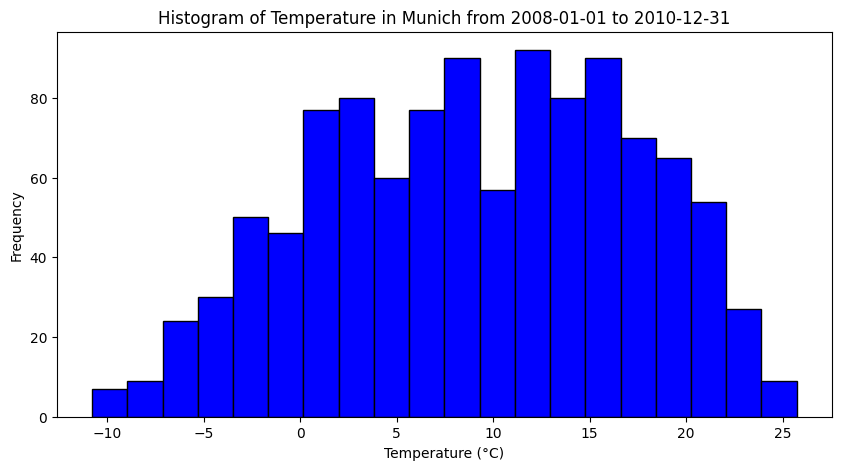

In [10]:
#histogram plot for munich over the period selected.
city = "Munich"
plt.figure(figsize=(10, 5))
plt.hist(city_df_period_2["AvgTemperatureCelsius"], bins=20, color="blue", edgecolor="black")
plt.title(f"Histogram of Temperature in {city} from {start_date} to {end_date}")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.plot()                # TODO plot each city line and use the label parameter to set the legend name for each city

# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.legend()

plt.show()

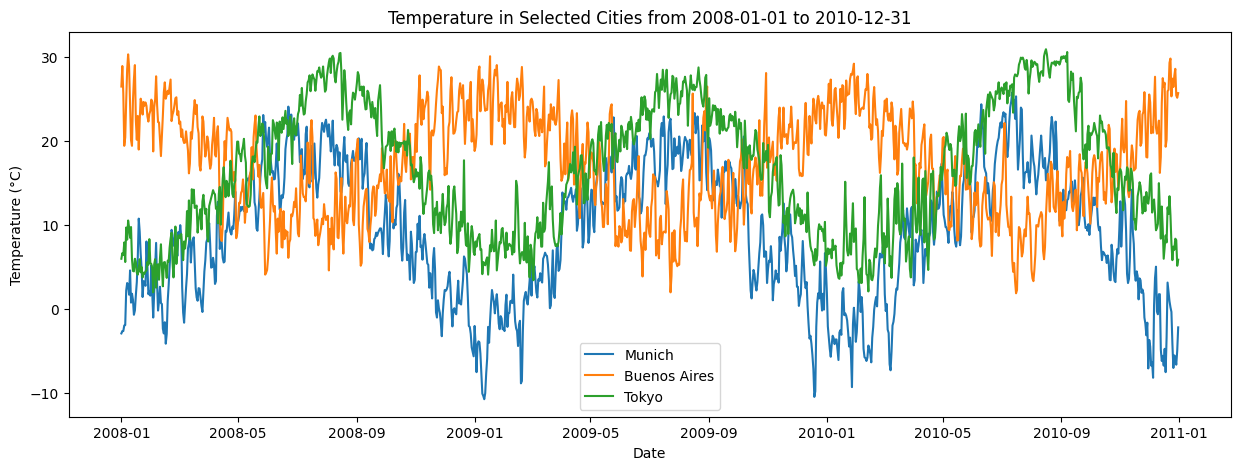

In [11]:
# line plot 
selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

for city in selected_cities:
    # Filter for the selected city
    city_df = temps_df[temps_df["City"] == city]
    
    # Filter for the selected period (inclusive)
    city_df_period_3 = city_df[city_df["Date"] >= start_date]
    city_df_period_4 = city_df_period_3[city_df_period_3["Date"] <= end_date]
    
    # Plot each city
    plt.plot(city_df_period_4["Date"], city_df_period_4["AvgTemperatureCelsius"], label=city)

plt.title(f"Temperature in Selected Cities from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



/var/folders/jz/vqrs317s4sb6d4vzpy2gm1qw0000gn/T/ipykernel_15057/4281969636.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


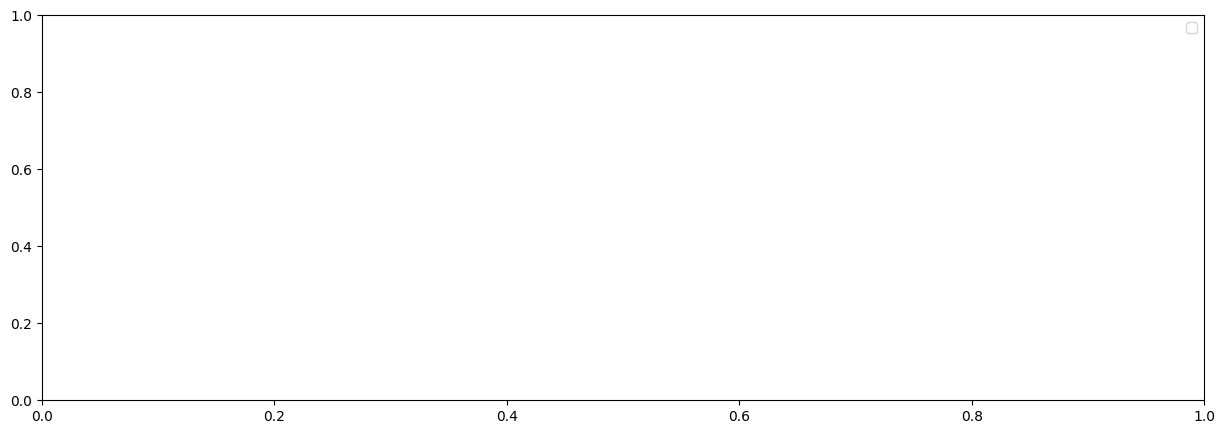

In [12]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.hist()                    # TODO: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 

# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.legend()

plt.show()


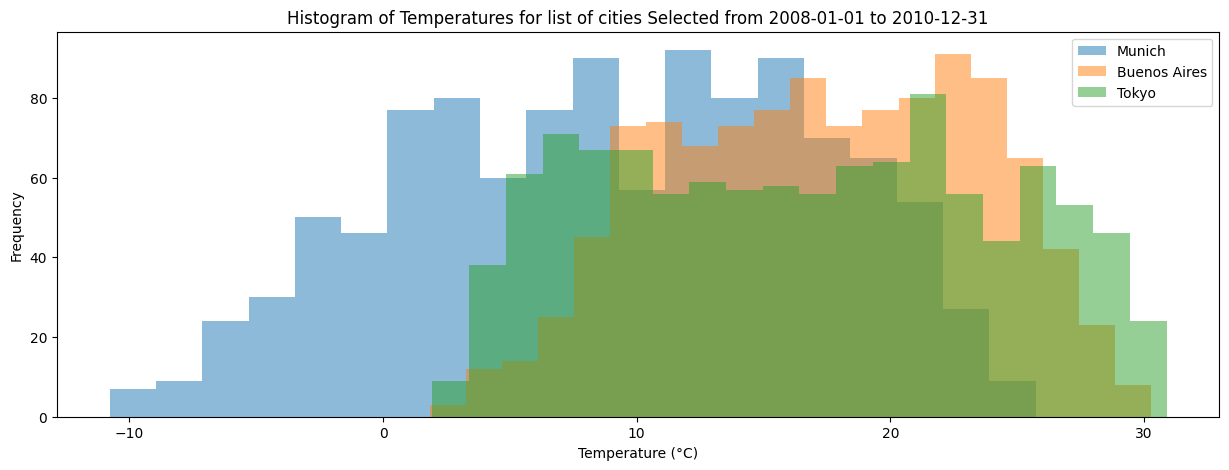

In [ ]:
# histogram plots. 

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()
 
plt.figure(figsize=(15, 5))

for city in selected_cities:
    # Filter for the selected city
    city_df = temps_df[temps_df["City"] == city]

    # Filter for the selected period (inclusive), that is why we use >= and <=.
    city_df_period_5 = city_df[city_df["Date"] >= start_date]
    city_df_period_6 = city_df_period_5[city_df_period_5["Date"] <= end_date]
    
    # Plot the histogram for the cities we have chosen
    plt.hist(city_df_period_6["AvgTemperatureCelsius"], bins=20, alpha=0.5, label=city)

plt.title(f"Histogram of Temperatures for list of cities Selected from {start_date} to {end_date}")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()

